# Comprehensive Analyzer Plots Example
This notebook demonstrates all available plotting methods in the `DwtAnalyzer` class from the `tbsim` package. It is adapted from the original Python script for interactive exploration.

In [19]:
import tbsim as mtb
import starsim as ss
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
TBS = mtb.TBS

## Build a TB simulation with dwell time analyzer

In [20]:
def build_tbsim():
    sim_params = dict(
        start = ss.date('2013'),
        stop = ss.date('2016'),
        rand_seed=1,
        dt=ss.days(7),
    )
    pop = ss.People(n_agents=1000)
    tb_params = dict(
        beta=ss.rate_prob(0.0025),
        init_prev=ss.bernoulli(p=0.25),
        rel_sus_latentslow=0.1,
        dt=ss.days(7),
    )
    tb = mtb.TB(tb_params)
    net = ss.RandomNet(dict(n_contacts=ss.poisson(lam=5), dur=0))
    dwell_analyzer = mtb.DwtAnalyzer(adjust_to_unit=True, unit=1.0, scenario_name='comprehensive_plots_example')
    sim = ss.Sim(
        people=pop,
        networks=net,
        diseases=tb,
        pars=sim_params,
        analyzers=dwell_analyzer,
    )
    sim.pars.verbose = 0
    return sim

## Run the simulation and extract the analyzer

In [21]:
print("Building and running TB simulation...")
sim_tb = build_tbsim()
sim_tb.run()
analyzer = sim_tb.analyzers[0]

Building and running TB simulation...
No dwell time data available to plot.
No data provided, or data is corrupted


/Users/mine/newgit/newtbsim/venv/lib/python3.12/site-packages/starsim/time.py:2092: RuntimeWarning:


The Starsim v2 class ss.rate_prob() is deprecated. Please use an ss.Rate() subclass, e.g. ss.year(0.0025) instead. The subclasses of ss.Rate() are: 
• ss.per() (rate at which an event happens, e.g. mortality rate), 
• ss.prob() (unitless probability, e.g. symptomatic infection), and 
• ss.freq() (number of events per time, e.g. acts per year). 
Although ss.freq() is the closest equivalent to ss.rate() in Starsim 2.0, in most cases (e.g. birth, death, or infection rates) you actually want ss.per().

/Users/mine/newgit/newtbsim/venv/lib/python3.12/site-packages/starsim/time.py:1441: RuntimeWarning:


Creating <class 'starsim.time.per'> with no unit specified is valid, but defaults to year. Set ss.options.warn_convert = False to disable this warning.



===> Dwell time logs saved to:
 /Users/mine/newgit/newtbsim/docs/tutorials/results/comprehensiveplotsexample-0908140330.csv



## 1. Sankey Diagrams
Demonstrate Sankey diagrams for state transitions.

In [22]:
# Basic Sankey diagram for all agents
analyzer.sankey_agents()


In [23]:

# Sankey diagram with dwell times
analyzer.sankey_dwelltimes(subtitle="State Transitions with Dwell Times")


In [24]:

# Sankey diagrams by age groups
analyzer.sankey_agents_by_age_subplots(bins=[0, 5, 15, 30, 50, 200], scenario="Age-stratified Analysis")


In [25]:

# Sankey diagrams with even age ranges
analyzer.sankey_agents_even_age_ranges(number_of_plots=3, scenario="Even Age Distribution")

## 2. Network Graphs
Visualize state transition networks.

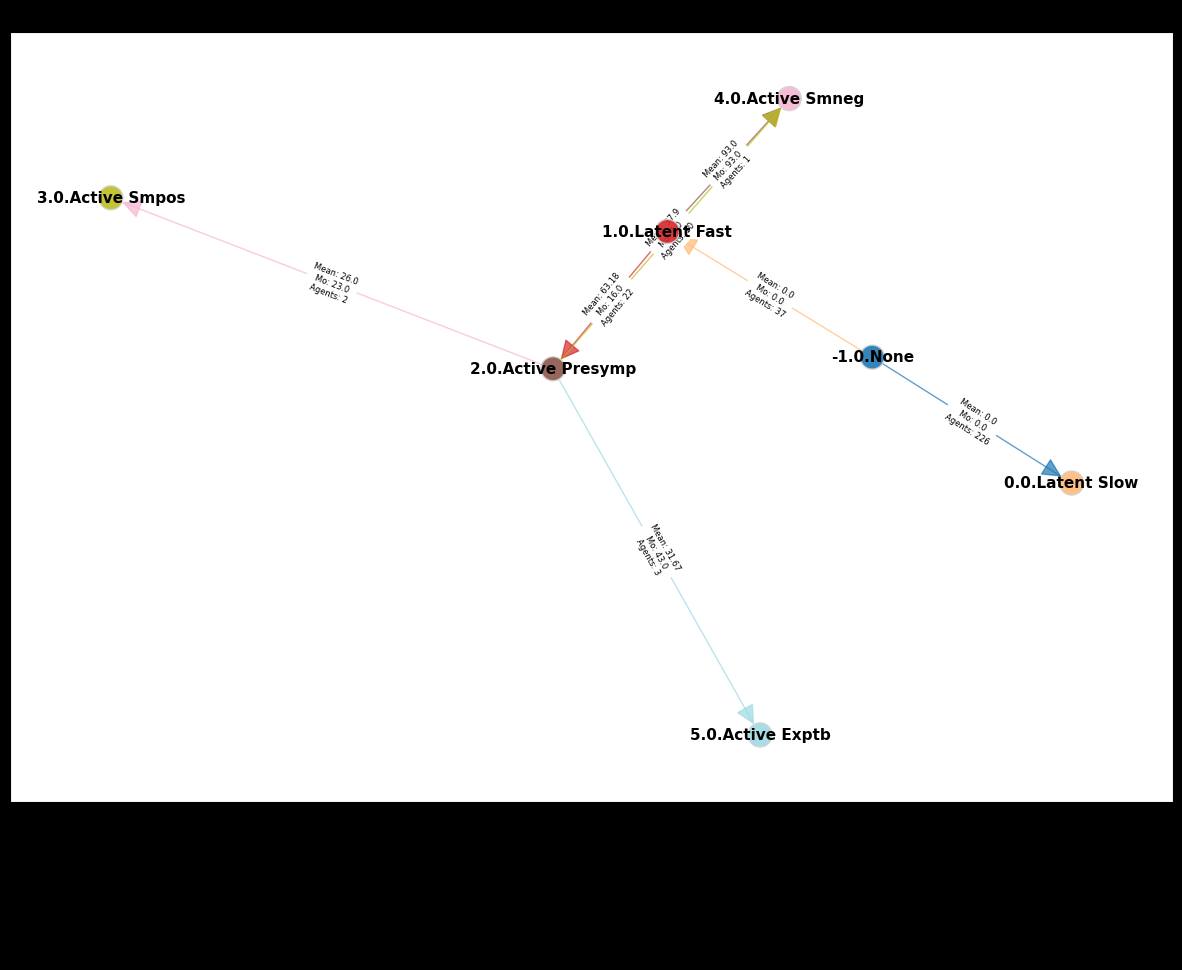

In [26]:
analyzer.graph_state_transitions(subtitle="State Transition Network", colormap='tab20')


<Figure size 1500x1000 with 0 Axes>

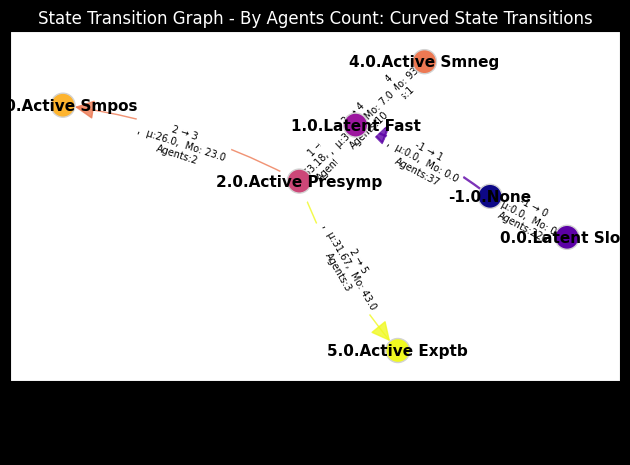

In [27]:

analyzer.graph_state_transitions_curved(subtitle="Curved State Transitions", colormap='plasma')

## 3. Histograms and Distributions
Explore dwell time distributions.

In [28]:
help(analyzer.histogram_with_kde)



Help on method histogram_with_kde in module tbsim.analyzers:

histogram_with_kde(subtitle='') method of tbsim.analyzers.DwtAnalyzer instance
    Create histograms with kernel density estimation for dwell time distributions.

    This method shows how long agents spend in each TB state, providing
    insights into the timing patterns of disease progression.

    .. image:: ../_static/histogram_kde_example.png
        :width: 500px
        :alt: Histogram with KDE showing dwell time distributions
        :align: center

    The plot above demonstrates:
    - **Histogram bars**: Frequency distribution of dwell times
    - **KDE curve**: Smooth probability density estimation
    - **Multi-panel layout**: One subplot per TB state
    - **Automatic scaling**: Optimized bin sizes and ranges

    Mathematical Model:
        For each state i:
        - Extract dwell times: T_i = {dwell_time for state i}
        - Create histogram: H_i(bin) = count(T_i in bin)
        - Calculate KDE: KDE_i(t) =

## 4. Interactive Bar Charts
Interactive bar charts for state transitions and reinfections.

In [29]:
analyzer.barchar_all_state_transitions_interactive(
    dwell_time_bins=[0, 30, 90, 180, 365, float('inf')],
    filter_states=['-1.0.None', '0.0.Latent Slow', '1.0.Latent Fast', '2.0.Active Presymp']
)



## 5. Stacked Bar Charts
Stacked bar charts for cumulative time and dwell time analysis.

In [30]:
# stacked_bars_states_per_agent_static
analyzer.barchar_all_state_transitions_interactive(
    dwell_time_bins=[0, 30, 90, 180, 365, float('inf')],
    filter_states=[  '1.0.Latent Fast', '2.0.Active Presymp']
)


## 6. Custom Transition Analysis
Custom transition subplots.

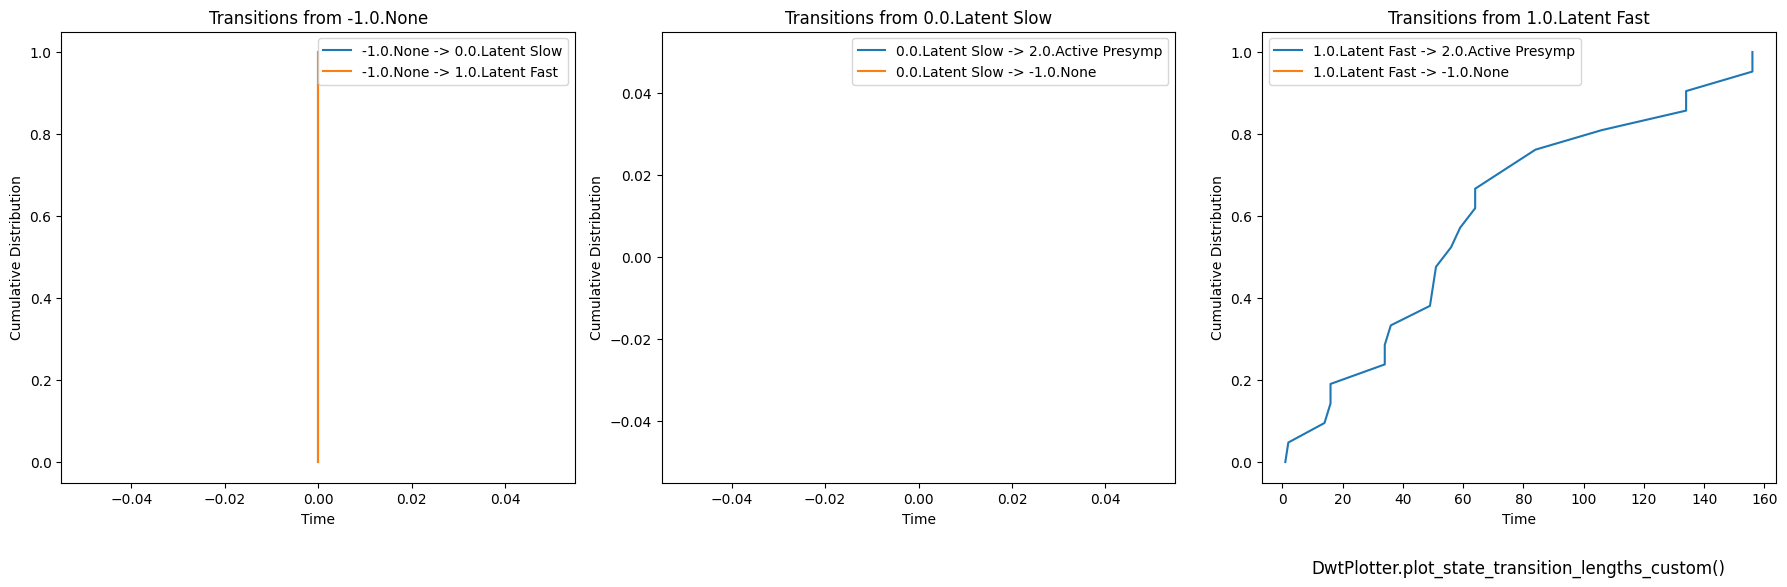

In [31]:
custom_transitions = {
    '-1.0.None': ['0.0.Latent Slow', '1.0.Latent Fast'],
    '0.0.Latent Slow': ['2.0.Active Presymp', '-1.0.None'],
    '1.0.Latent Fast': ['2.0.Active Presymp', '-1.0.None']
}
analyzer.subplot_custom_transitions(transitions_dict=custom_transitions)

## 7. Survival Analysis
Kaplan-Meier survival curve for dwell times.

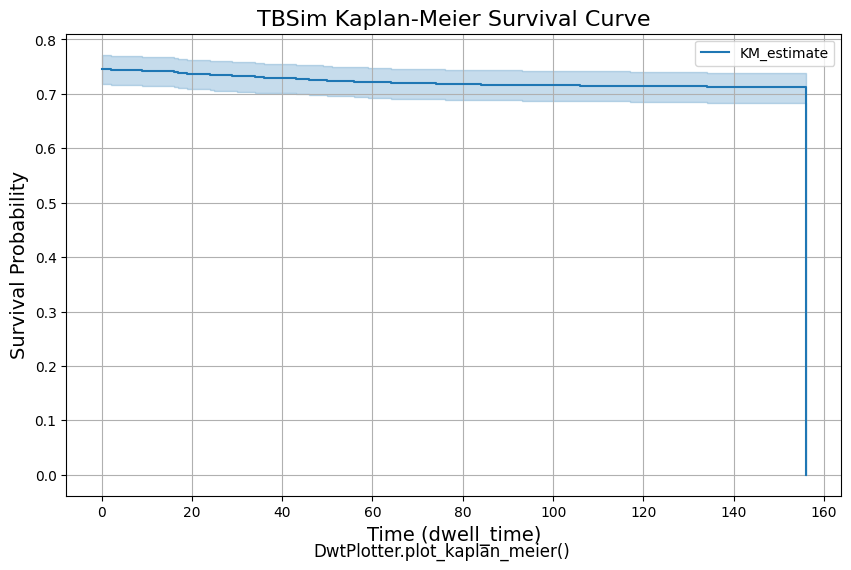

In [32]:
analyzer.plot_kaplan_meier(dwell_time_col='dwell_time')

## 8. Using DwtPlotter Directly
Demonstrate additional plots using the DwtPlotter class.

Generated data file: /Users/mine/newgit/newtbsim/docs/tutorials/results/comprehensiveplotsexample-0908140330.csv


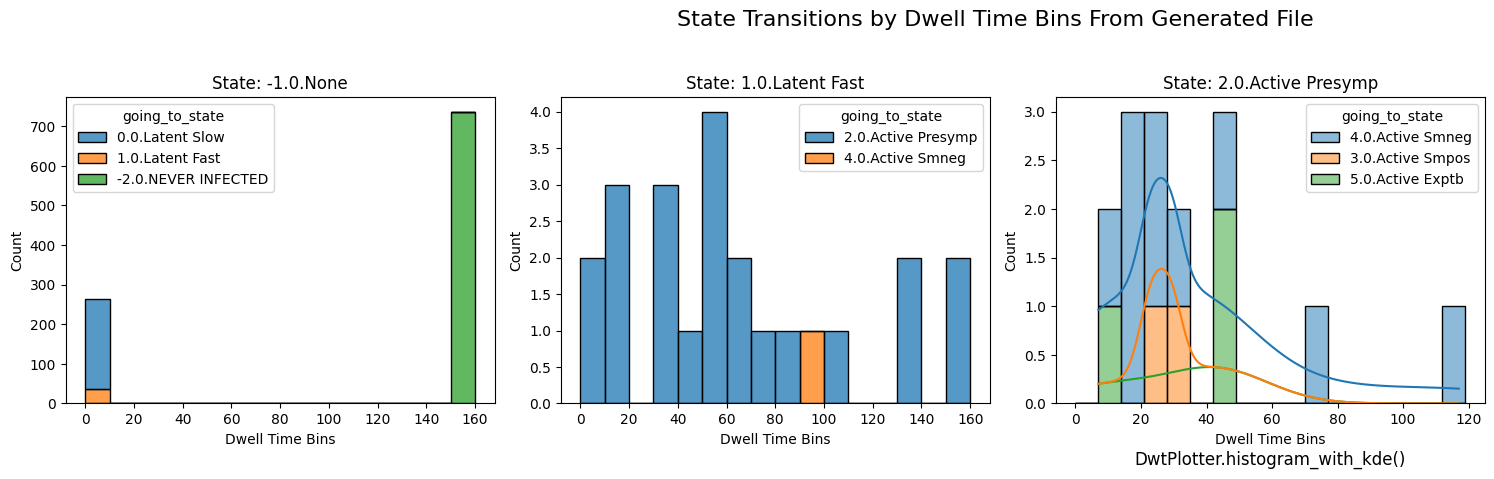

In [33]:
file_path = analyzer.file_path
print(f'Generated data file: {file_path}')
plotter = mtb.DwtPlotter(file_path=file_path)
plotter.histogram_with_kde(subtitle="From Generated File")
plotter.sankey_agents(subtitle="From Generated File")

## 9. Post Processor Demonstration
Example usage of the DwtPostProcessor for multiple simulation results. (This is informational; actual usage requires multiple result files.)

In [34]:
# Example usage (commented out):
# postproc = mtb.DwtPostProcessor(directory='results', prefix='Baseline')
# postproc.sankey_agents(subtitle="Aggregated Results")
# postproc.histogram_with_kde(subtitle="Aggregated Distributions")
# postproc.reinfections_percents_bars_interactive(
#     target_states=[0.0, 1.0],
#     scenario="Aggregated Reinfection Analysis"
# )